# Exercise 6

In [1]:
# Importing libs
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, -0.1, 'Orange')

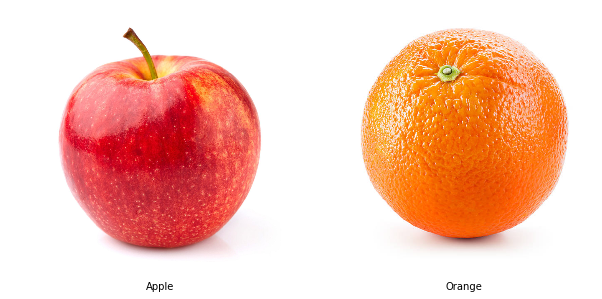

In [2]:
apple = cv2.imread('images/apple.jpg')
apple = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB)
apple = cv2.resize(apple, (512,512))

orange = cv2.imread('images/orange.jpg')
orange = cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)
orange = cv2.resize(orange, (512,512))

plt.figure(figsize=(10,10))
ax1 = plt.subplot(121)
ax1.imshow(apple)
ax2 = plt.subplot(122)
ax2.imshow(orange)

ax1.axis('off')
ax2.axis('off')

ax1.text(0.5,-0.1, "Apple", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Orange", ha="center", transform=ax2.transAxes)

In [3]:
def combine(img1, img2):
    result = np.zeros(img1.shape, dtype='uint')
    
    h,w,_ = img1.shape
    
    result[:,0:w//2,:] = img1[:,0:w//2,:]
    result[:,w//2:,:] = img2[:,w//2:,:]
    
    return result.astype('uint8')

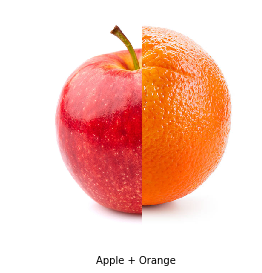

In [4]:
apple_orange = combine(apple,orange)

plt.imshow(apple_orange)
plt.axis('off')
plt.figtext(0.5, 0, 'Apple + Orange', horizontalalignment='center')
plt.show()

In [5]:
def buildPyramid(levels, left,right=None):
    lresult = left
    rresult = right if type(right) is np.ndarray else left
    
    for i in range(levels):
        lresult = cv2.pyrDown(lresult)
        rresult = cv2.pyrDown(rresult)
    
    for i in range(levels):
        lresult = cv2.pyrUp(lresult)
        rresult = cv2.pyrUp(rresult)
    
    return combine(lresult,rresult)

Text(0.5, -0.1, 'After Pyramid')

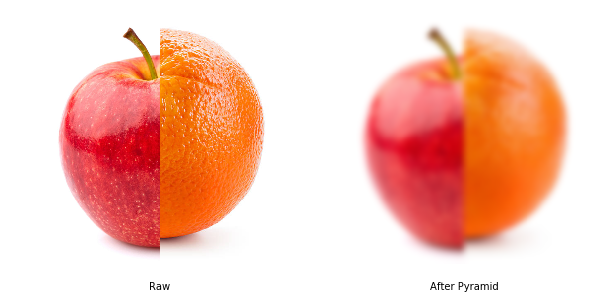

In [6]:
apple_orange_pyramid = buildPyramid(3, apple_orange)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(121)
ax1.imshow(apple_orange)
ax2 = plt.subplot(122)
ax2.imshow(apple_orange_pyramid)

ax1.axis('off')
ax2.axis('off')

ax1.text(0.5,-0.1, "Raw", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "After Pyramid", ha="center", transform=ax2.transAxes)

Text(0.5, -0.1, 'After Pyramid')

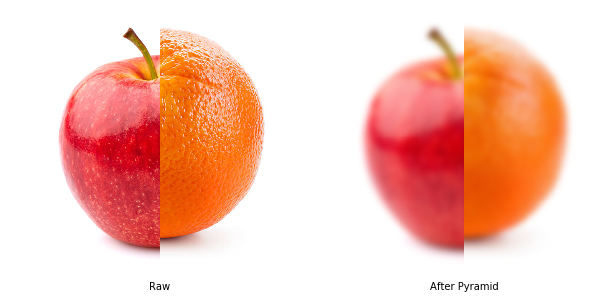

In [7]:
apple_orange_pyramid = buildPyramid(3, apple, orange)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(121)
ax1.imshow(apple_orange)
ax2 = plt.subplot(122)
ax2.imshow(apple_orange_pyramid)

ax1.axis('off')
ax2.axis('off')

ax1.text(0.5,-0.1, "Raw", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "After Pyramid", ha="center", transform=ax2.transAxes)

## Another implementation

In [8]:
def buildPyramid2(levels, left,right=None):
    lresult = left
    rresult = right if type(right) is np.ndarray else left
    
    for i in range(levels):
        lresult = cv2.pyrDown(lresult)
        rresult = cv2.pyrDown(rresult)
    
    result = combine(lresult,rresult)
    
    for i in range(levels):
        result = cv2.pyrUp(result)
    
    return result

Text(0.5, -0.1, 'After Pyramid')

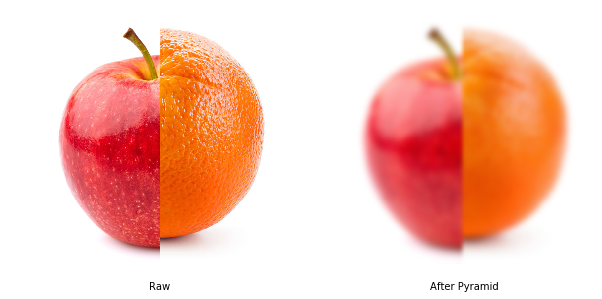

In [9]:
apple_orange_pyramid = buildPyramid2(3, apple, orange)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(121)
ax1.imshow(apple_orange)
ax2 = plt.subplot(122)
ax2.imshow(apple_orange_pyramid)

ax1.axis('off')
ax2.axis('off')

ax1.text(0.5,-0.1, "Raw", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "After Pyramid", ha="center", transform=ax2.transAxes)